In [2]:
# Import standard libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from numpy import mean
from numpy import std
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import model libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Read data
df = pd.read_csv("data\churn_clean.csv")
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Learning about the dataset
print(df.shape)
df.describe()

(10000, 50)


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [4]:
# Printing variables types
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [5]:
# Filtering all suitable variables into a gross dataframe
dfg = df[['Churn', 'Population', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
        'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
print(dfg.shape)

(10000, 29)


In [6]:
# Converting categories to numbers
dfg.Marital = pd.Categorical(dfg.Marital)
dfg['Marital_numeric'] = dfg.Marital.cat.codes

dfg.Gender = pd.Categorical(dfg.Gender)
dfg['Gender_numeric'] = dfg.Gender.cat.codes

dfg.Contract = pd.Categorical(dfg.Contract)
dfg['Contract_numeric'] = dfg.Contract.cat.codes

dfg.InternetService = pd.Categorical(dfg.InternetService)
dfg['InternetService_numeric'] = dfg.InternetService.cat.codes

dfg.PaymentMethod = pd.Categorical(dfg.PaymentMethod)
dfg['PaymentMethod_numeric'] = dfg.PaymentMethod.cat.codes

# Drop non-categorical variants
del dfg['Marital']
del dfg['Gender']
del dfg['Contract']
del dfg['InternetService']
del dfg['PaymentMethod']

In [7]:
# Converting dummies to 1/0
dfg = pd.get_dummies(data=dfg, drop_first=True)
dfg.head()
print(dfg.shape)
dfg.dtypes

(10000, 29)


Population                   int64
Children                     int64
Age                          int64
Income                     float64
Outage_sec_perweek         float64
Email                        int64
Contacts                     int64
Yearly_equip_failure         int64
Tenure                     float64
MonthlyCharge              float64
Bandwidth_GB_Year          float64
Marital_numeric               int8
Gender_numeric                int8
Contract_numeric              int8
InternetService_numeric       int8
PaymentMethod_numeric         int8
Churn_Yes                    uint8
Techie_Yes                   uint8
Port_modem_Yes               uint8
Tablet_Yes                   uint8
Phone_Yes                    uint8
Multiple_Yes                 uint8
OnlineSecurity_Yes           uint8
OnlineBackup_Yes             uint8
DeviceProtection_Yes         uint8
TechSupport_Yes              uint8
StreamingTV_Yes              uint8
StreamingMovies_Yes          uint8
PaperlessBilling_Yes

In [8]:
# Saving the cleaned set to .csv
dfg.to_csv("data\churn_clean_gross.csv", index = False)

In [8]:
# Correlation chart for all cleaned variables
dfg.corr()

,Tenure,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,...,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
Tenure,1.000000,-0.003559,-0.005091,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,-0.003337,...,0.000544,0.003256,-0.010422,0.002508,0.020802,-0.028114,-0.001377,0.002440,-0.002574,-0.000655
Population,-0.003559,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,0.004019,-0.004483,-0.004778,...,0.001225,0.008196,-0.001241,0.012549,0.010352,-0.003795,-0.006606,-0.006590,-0.005882,0.008656
Children,-0.005091,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.009781,...,0.001494,-0.001629,-0.021969,0.006937,-0.000297,0.005477,0.000878,-0.007106,0.003461,0.006828
Age,0.016979,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.010729,...,-0.004384,0.009521,-0.004674,-0.011213,0.003309,0.014489,0.017155,-0.000197,0.010125,0.002247
Income,0.002114,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,-0.003014,...,0.005999,-0.001677,-0.000214,-0.010385,-0.005974,0.014073,0.008835,-0.003324,-0.002186,-0.012049
Outage_sec_perweek,0.002932,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.020496,...,0.005614,-0.010267,0.012142,-0.002416,0.000457,0.022008,-0.013221,0.008952,0.018086,-0.011208
Email,-0.014468,0.017962,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,0.001997,...,-0.008579,-0.007281,-0.002966,-0.024908,-0.011763,0.001520,0.022119,0.005099,0.000711,-0.012632
Contacts,0.002820,0.004019,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.004259,...,-0.011855,0.005422,-0.016090,0.010922,0.010398,0.000497,-0.013009,0.000524,0.011002,-0.002649
Yearly_equip_failure,0.012435,-0.004483,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,-0.007172,...,0.003634,-0.007929,0.002213,-0.016486,-0.011500,-0.005903,0.003735,0.002597,-0.004473,0.016603
MonthlyCharge,-0.003337,-0.004778,-0.009781,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,1.000000,...,0.007280,-0.018977,0.385979,0.047734,0.259440,0.162735,0.120301,0.482312,0.608115,0.001348


<AxesSubplot:>

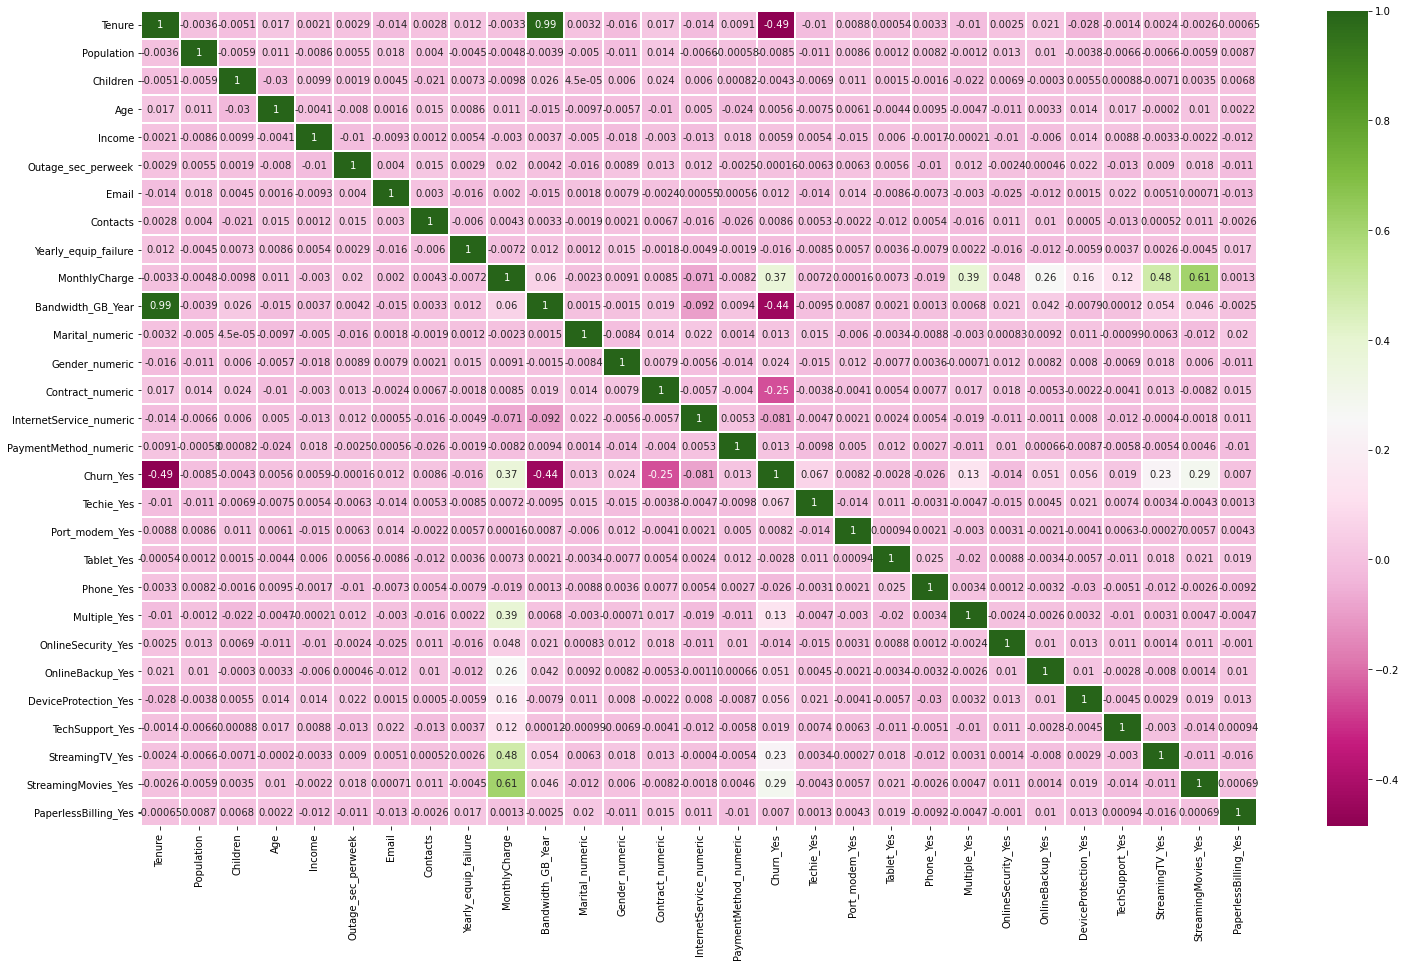

In [9]:
# Heatmap for all cleaned variables
plt.figure(figsize=(25,15))
sns.heatmap(dfg.corr(),annot=True,lw=1,cmap="PiYG")

In [10]:
# Returning summary statistics for each variable in the model
dfg['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [11]:
dfg['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [12]:
dfg['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [13]:
dfg['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [14]:
dfg['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [15]:
dfg['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [16]:
dfg['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

In [17]:
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [18]:
dfg['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [19]:
dfg['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [20]:
dfg['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [21]:
dfg['Marital_numeric'].describe()

count    10000.00000
mean         1.99730
std          1.42839
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          4.00000
Name: Marital_numeric, dtype: float64

In [22]:
dfg['Gender_numeric'].describe()

count    10000.00000
mean         0.52060
std          0.54388
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          2.00000
Name: Gender_numeric, dtype: float64

In [23]:
dfg['Contract_numeric'].describe()

count    10000.000000
mean         0.698600
std          0.836079
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Contract_numeric, dtype: float64

In [25]:
dfg['InternetService_numeric'].describe()

count    10000.000000
mean         0.866600
std          0.735839
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: InternetService_numeric, dtype: float64

In [26]:
dfg['PaymentMethod_numeric'].describe()

count    10000.00000
mean         1.57490
std          1.07159
min          0.00000
25%          1.00000
50%          2.00000
75%          2.00000
max          3.00000
Name: PaymentMethod_numeric, dtype: float64

In [27]:
dfg['Churn_Yes'].describe()

count    10000.000000
mean         0.265000
std          0.441355
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churn_Yes, dtype: float64

In [28]:
dfg['Techie_Yes'].describe()

count    10000.000000
mean         0.167900
std          0.373796
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Techie_Yes, dtype: float64

In [29]:
dfg['Port_modem_Yes'].describe()

count    10000.000000
mean         0.483400
std          0.499749
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Port_modem_Yes, dtype: float64

In [30]:
dfg['Tablet_Yes'].describe()

count    10000.000000
mean         0.299100
std          0.457887
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Tablet_Yes, dtype: float64

In [31]:
dfg['Phone_Yes'].describe()

count    10000.000000
mean         0.906700
std          0.290867
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Phone_Yes, dtype: float64

In [32]:
dfg['Multiple_Yes'].describe()

count    10000.000000
mean         0.460800
std          0.498486
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Multiple_Yes, dtype: float64

In [33]:
dfg['OnlineSecurity_Yes'].describe()

count    10000.000000
mean         0.357600
std          0.479317
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: OnlineSecurity_Yes, dtype: float64

In [34]:
dfg['OnlineBackup_Yes'].describe()

count    10000.000000
mean         0.450600
std          0.497579
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: OnlineBackup_Yes, dtype: float64

In [35]:
dfg['DeviceProtection_Yes'].describe()

count    10000.000000
mean         0.438600
std          0.496241
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: DeviceProtection_Yes, dtype: float64

In [36]:
dfg['TechSupport_Yes'].describe()

count    10000.000000
mean         0.375000
std          0.484147
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: TechSupport_Yes, dtype: float64

In [37]:
dfg['StreamingTV_Yes'].describe()

count    10000.000000
mean         0.492900
std          0.499975
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: StreamingTV_Yes, dtype: float64

In [38]:
dfg['StreamingMovies_Yes'].describe()

count    10000.000000
mean         0.489000
std          0.499904
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: StreamingMovies_Yes, dtype: float64

In [39]:
dfg['PaperlessBilling_Yes'].describe()

count    10000.000000
mean         0.588200
std          0.492184
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: PaperlessBilling_Yes, dtype: float64

<AxesSubplot:>

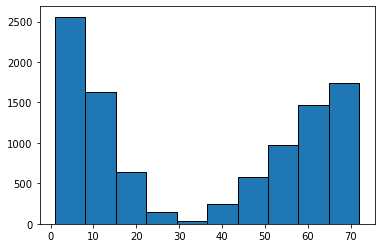

In [40]:
# Generating univariate visualizations
dfg.Tenure.hist(edgecolor='black', grid=0)

<AxesSubplot:>

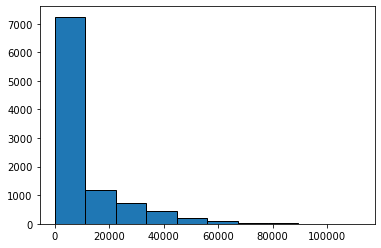

In [41]:
dfg.Population.hist(edgecolor='black', grid=0)

<AxesSubplot:>

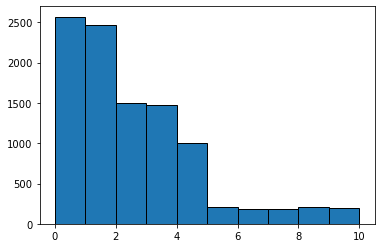

In [42]:
dfg.Children.hist(edgecolor='black', grid=0)

<AxesSubplot:>

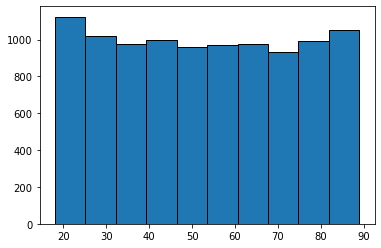

In [43]:
dfg.Age.hist(edgecolor='black', grid=0)

<AxesSubplot:>

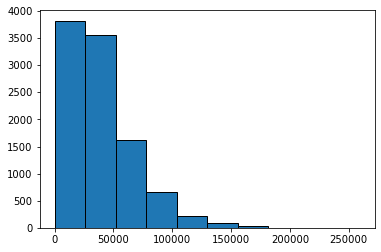

In [44]:
dfg.Income.hist(edgecolor='black', grid=0)

<AxesSubplot:>

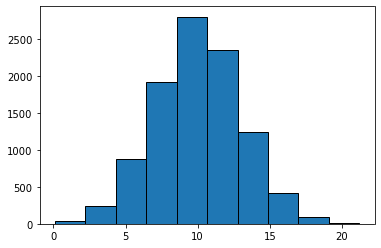

In [45]:
dfg.Outage_sec_perweek.hist(edgecolor='black', grid=0)

<AxesSubplot:>

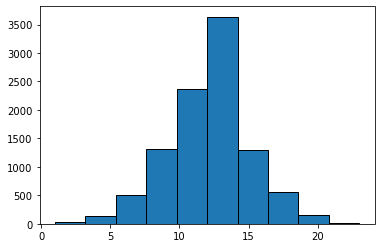

In [46]:
dfg.Email.hist(edgecolor='black', grid=0)

<AxesSubplot:>

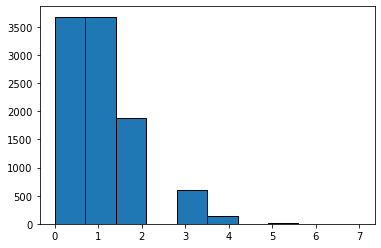

In [47]:
dfg.Contacts.hist(edgecolor='black', grid=0)

<AxesSubplot:>

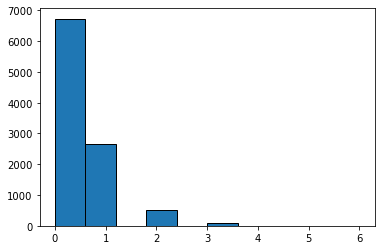

In [48]:
dfg.Yearly_equip_failure.hist(edgecolor='black', grid=0)

<AxesSubplot:>

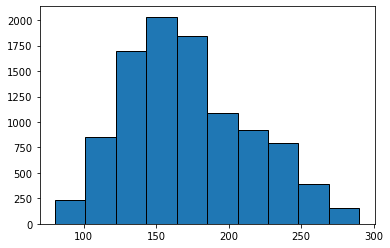

In [49]:
dfg.MonthlyCharge.hist(edgecolor='black', grid=0)

<AxesSubplot:>

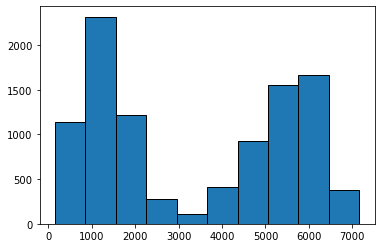

In [50]:
dfg.Bandwidth_GB_Year.hist(edgecolor='black', grid=0)

<AxesSubplot:>

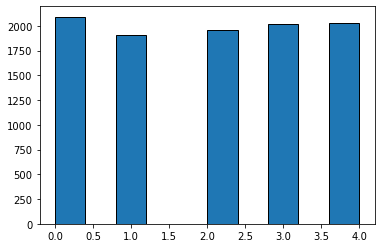

In [51]:
dfg.Marital_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

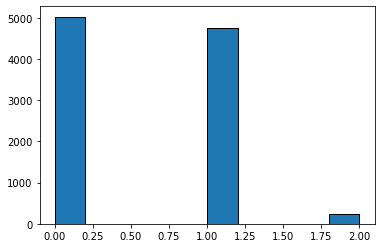

In [52]:
dfg.Gender_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

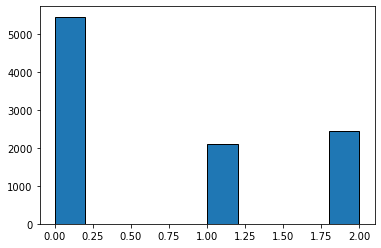

In [53]:
dfg.Contract_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

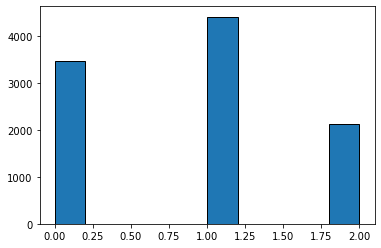

In [54]:
dfg.InternetService_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

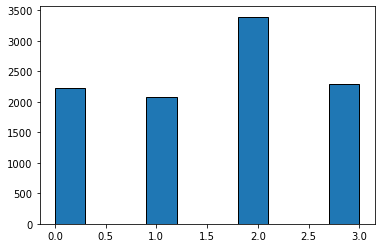

In [55]:
dfg.PaymentMethod_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

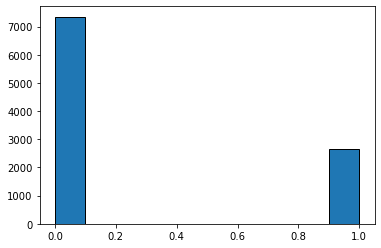

In [56]:
dfg.Churn_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

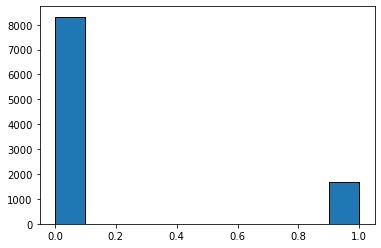

In [57]:
dfg.Techie_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

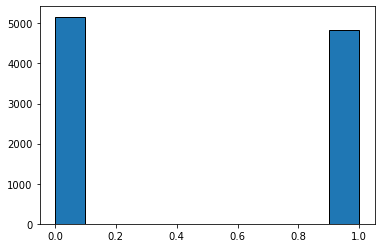

In [58]:
dfg.Port_modem_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

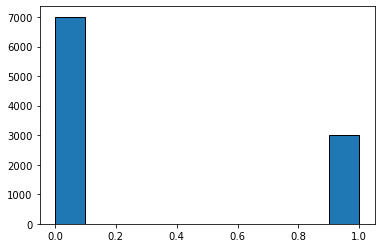

In [59]:
dfg.Tablet_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

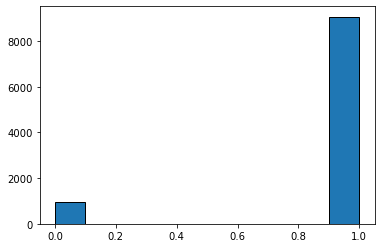

In [60]:
dfg.Phone_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

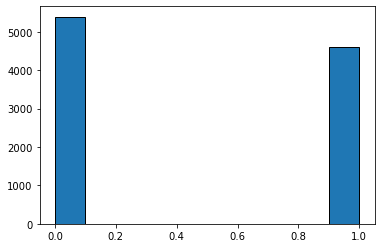

In [61]:
dfg.Multiple_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

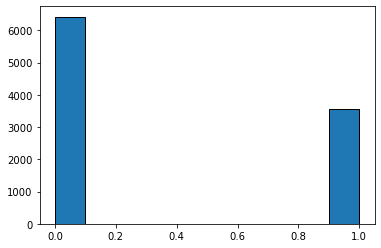

In [62]:
dfg.OnlineSecurity_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

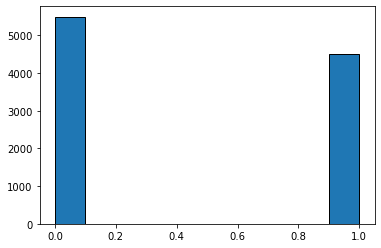

In [63]:
dfg.OnlineBackup_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

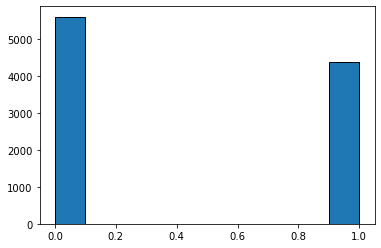

In [64]:
dfg.DeviceProtection_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

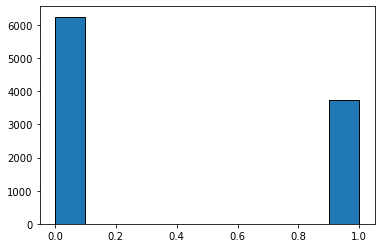

In [65]:
dfg.TechSupport_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

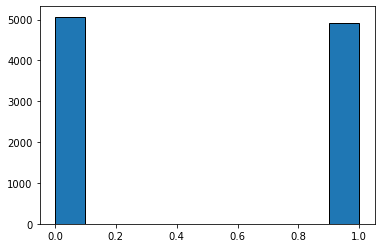

In [66]:
dfg.StreamingTV_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

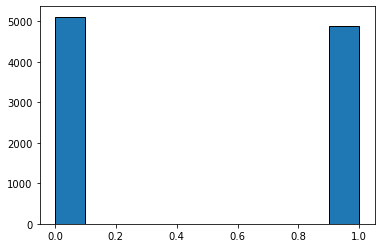

In [67]:
dfg.StreamingMovies_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

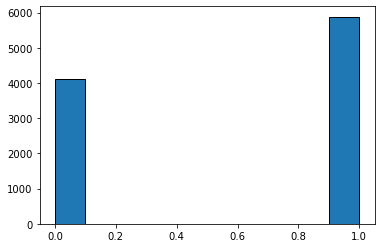

In [68]:
dfg.PaperlessBilling_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:xlabel='Tenure', ylabel='Population'>

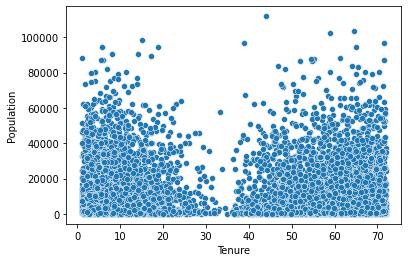

In [69]:
# Generating bivariate visualization using 'Tenure'
sns.scatterplot(data=dfg, x="Tenure", y="Population")

<AxesSubplot:xlabel='Tenure', ylabel='Children'>

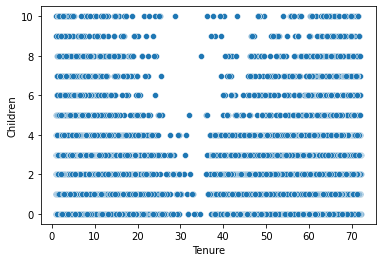

In [70]:
sns.scatterplot(data=dfg, x="Tenure", y="Children")

<AxesSubplot:xlabel='Tenure', ylabel='Age'>

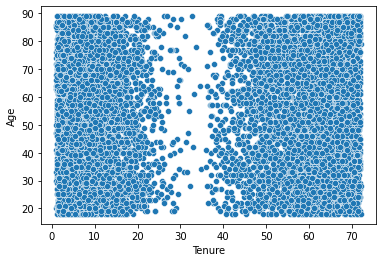

In [71]:
sns.scatterplot(data=dfg, x="Tenure", y="Age")

<AxesSubplot:xlabel='Tenure', ylabel='Income'>

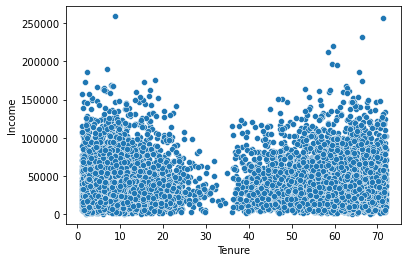

In [72]:
sns.scatterplot(data=dfg, x="Tenure", y="Income")

<AxesSubplot:xlabel='Tenure', ylabel='Outage_sec_perweek'>

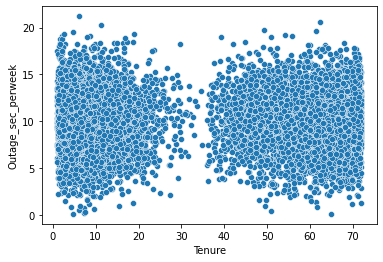

In [73]:
sns.scatterplot(data=dfg, x="Tenure", y="Outage_sec_perweek")

<AxesSubplot:xlabel='Tenure', ylabel='Email'>

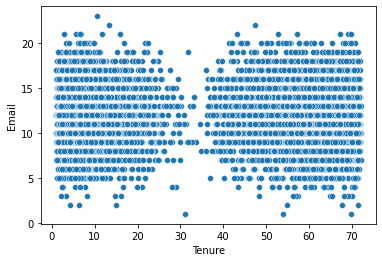

In [74]:
sns.scatterplot(data=dfg, x="Tenure", y="Email")

<AxesSubplot:xlabel='Tenure', ylabel='Contacts'>

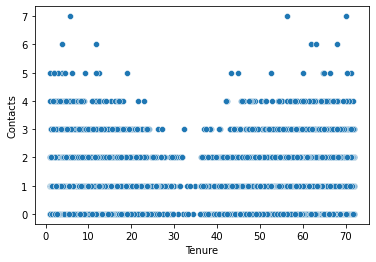

In [75]:
sns.scatterplot(data=dfg, x="Tenure", y="Contacts")

<AxesSubplot:xlabel='Tenure', ylabel='Yearly_equip_failure'>

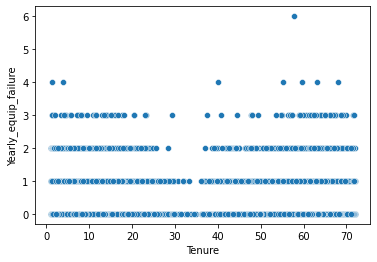

In [76]:
sns.scatterplot(data=dfg, x="Tenure", y="Yearly_equip_failure")

<AxesSubplot:xlabel='Tenure', ylabel='MonthlyCharge'>

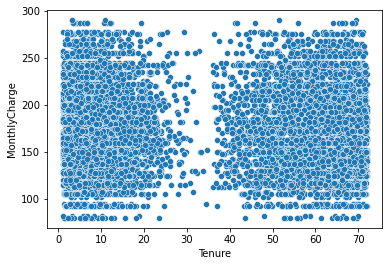

In [77]:
sns.scatterplot(data=dfg, x="Tenure", y="MonthlyCharge")

<AxesSubplot:xlabel='Tenure', ylabel='Marital_numeric'>

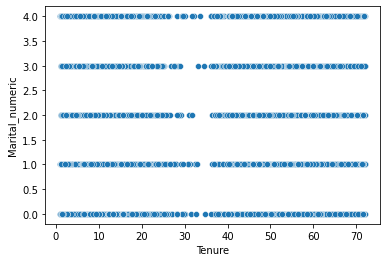

In [78]:
sns.scatterplot(data=dfg, x="Tenure", y="Marital_numeric")

<AxesSubplot:xlabel='Tenure', ylabel='Gender_numeric'>

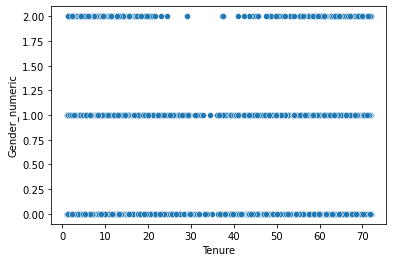

In [79]:
sns.scatterplot(data=dfg, x="Tenure", y="Gender_numeric")

<AxesSubplot:xlabel='Tenure', ylabel='Contract_numeric'>

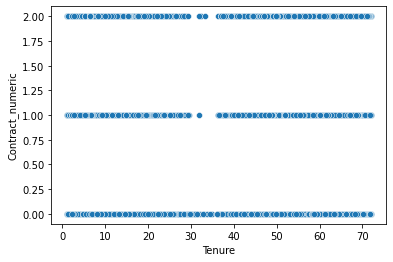

In [80]:
sns.scatterplot(data=dfg, x="Tenure", y="Contract_numeric")

<AxesSubplot:xlabel='Tenure', ylabel='InternetService_numeric'>

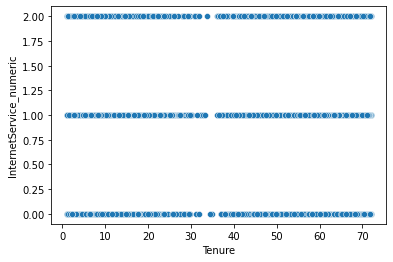

In [81]:
sns.scatterplot(data=dfg, x="Tenure", y="InternetService_numeric")

<AxesSubplot:xlabel='Tenure', ylabel='PaymentMethod_numeric'>

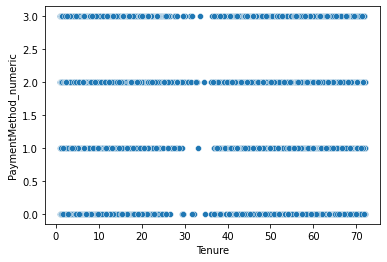

In [82]:
sns.scatterplot(data=dfg, x="Tenure", y="PaymentMethod_numeric")

<AxesSubplot:xlabel='Tenure', ylabel='Churn_Yes'>

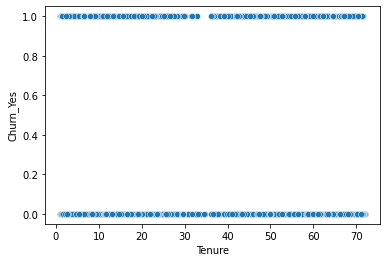

In [83]:
sns.scatterplot(data=dfg, x="Tenure", y="Churn_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='Techie_Yes'>

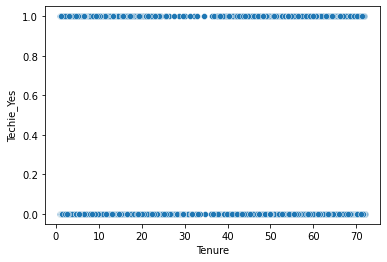

In [84]:
sns.scatterplot(data=dfg, x="Tenure", y="Techie_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='Port_modem_Yes'>

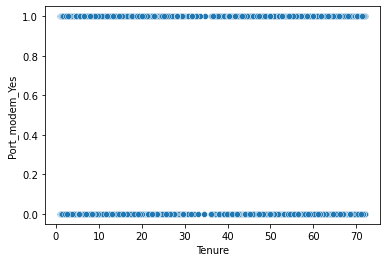

In [85]:
sns.scatterplot(data=dfg, x="Tenure", y="Port_modem_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='Tablet_Yes'>

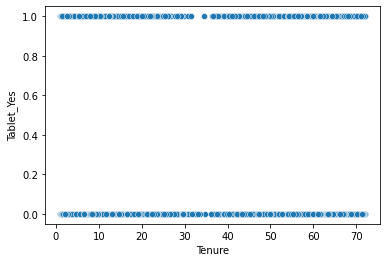

In [86]:
sns.scatterplot(data=dfg, x="Tenure", y="Tablet_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='Phone_Yes'>

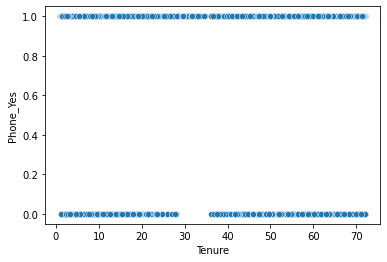

In [87]:
sns.scatterplot(data=dfg, x="Tenure", y="Phone_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='Multiple_Yes'>

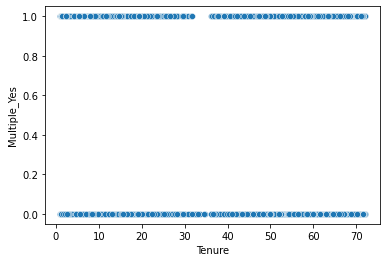

In [88]:
sns.scatterplot(data=dfg, x="Tenure", y="Multiple_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='OnlineSecurity_Yes'>

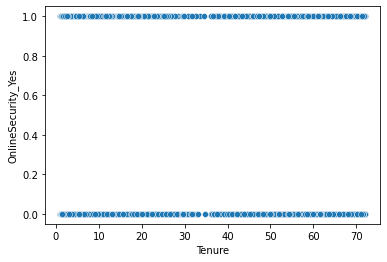

In [89]:
sns.scatterplot(data=dfg, x="Tenure", y="OnlineSecurity_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='OnlineBackup_Yes'>

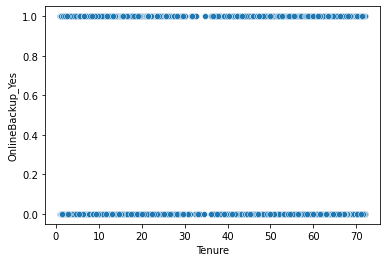

In [90]:
sns.scatterplot(data=dfg, x="Tenure", y="OnlineBackup_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='DeviceProtection_Yes'>

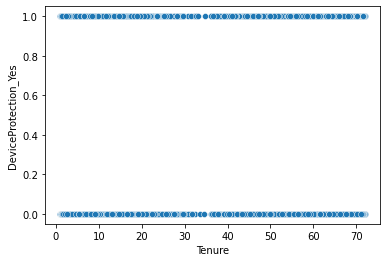

In [91]:
sns.scatterplot(data=dfg, x="Tenure", y="DeviceProtection_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='TechSupport_Yes'>

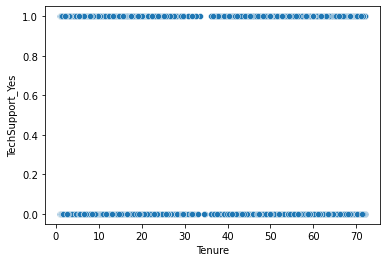

In [92]:
sns.scatterplot(data=dfg, x="Tenure", y="TechSupport_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='StreamingTV_Yes'>

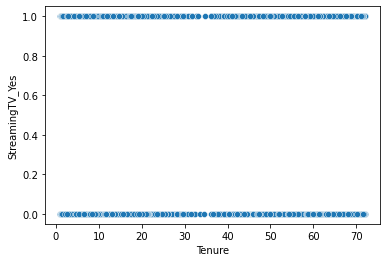

In [93]:
sns.scatterplot(data=dfg, x="Tenure", y="StreamingTV_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='StreamingMovies_Yes'>

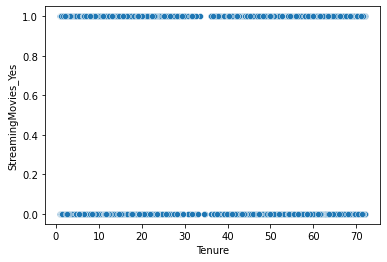

In [94]:
sns.scatterplot(data=dfg, x="Tenure", y="StreamingMovies_Yes")

<AxesSubplot:xlabel='Tenure', ylabel='PaperlessBilling_Yes'>

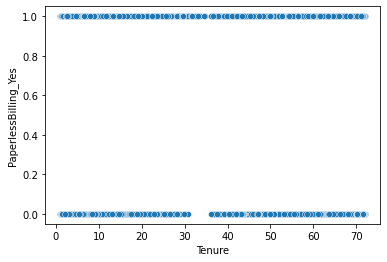

In [95]:
sns.scatterplot(data=dfg, x="Tenure", y="PaperlessBilling_Yes")

In [144]:
# Gathering the variables with highest correlation for the gross model, removing the 10 least correlated variables: 29 -> 19
Xg = dfg[['Population', 'Children', 'Age', 'Email', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Marital_numeric', 'Gender_numeric', 'Contract_numeric', 'InternetService_numeric', 'PaymentMethod_numeric',
          'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes']]
yg = dfg['Tenure']
print(Xg.shape)

(10000, 19)


In [145]:
# Running the gross model
est = sm.OLS(yg, Xg).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.775e+05
Date:                Wed, 25 Aug 2021   Prob (F-statistic):                        0.00
Time:                        20:43:44   Log-Likelihood:                         -20556.
No. Observations:               10000   AIC:                                  4.115e+04
Df Residuals:                    9981   BIC:                                  4.129e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Population               -2.67e-06   1.31e-06     -2.041      0.041   -5.23e-06   -1.06e-07
Children                   -0.3966      0.009    -45.277      0.000      -0.414      -0.379
Age                         0.0327      0.001     37.746      0.000       0.031       0.034
Email                      -0.0699      0.005    -12.906      0.000      -0.081      -0.059
Yearly_equip_failure       -0.0583      0.030     -1.965      0.049      -0.116      -0.000
MonthlyCharge              -0.0350      0.001    -68.808      0.000      -0.036      -0.034
Bandwidth_GB_Year           0.0120   1.01e-05   1179.645      0.000       0.012       0.012
Marital_numeric            -0.0391      0.013     -2.999      0.003      -0.065      -0.014
Gender_numeric             -0.7054      0.035    -20.389      0.000      -0.773      -0.638
Contract_numeric           -0.2613      0.024    -11.008      0.000      -0.308      -0.215
InternetService_numeric     2.4530      0.026     95.722      0.000       2.403       2.503
PaymentMethod_numeric      -0.0834      0.017     -4.808      0.000      -0.117      -0.049
Churn_Yes                  -1.5399      0.057    -27.060      0.000      -1.651      -1.428
Techie_Yes                  0.0462      0.051      0.911      0.362      -0.053       0.146
Port_modem_Yes             -0.0708      0.038     -1.879      0.060      -0.145       0.003
Phone_Yes                  -0.6813      0.060    -11.432      0.000      -0.798      -0.565
Multiple_Yes                0.3724      0.041      8.988      0.000       0.291       0.454
OnlineBackup_Yes           -0.3319      0.040     -8.352      0.000      -0.410      -0.254
DeviceProtection_Yes       -0.6608      0.039    -17.031      0.000      -0.737      -0.585
==============================================================================
Omnibus:                     3058.202   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.677
Skew:                           0.129   Prob(JB):                    1.27e-106
Kurtosis:                       1.949   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
# Removing variables where P > .05
Xr = dfg[['Children', 'Age', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Gender_numeric', 'Contract_numeric', 'InternetService_numeric',
          'Churn_Yes', 'Techie_Yes', 'Multiple_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes']]
yr = dfg['Tenure']

In [120]:
# Checking for multicollinearity in Xr
vif_data = pd.DataFrame()
vif_data["feature"] = Xr.columns
vif_data["VIF"] = [variance_inflation_factor(Xr.values, i)
                          for i in range(len(Xr.columns))]
print(vif_data)

                    feature        VIF
0                  Children   1.888465
1                       Age   5.977112
2             MonthlyCharge  17.691522
3         Bandwidth_GB_Year   4.547928
4            Gender_numeric   1.864722
5          Contract_numeric   1.848490
6   InternetService_numeric   2.263584
7                 Churn_Yes   2.391994
8                Techie_Yes   1.201404
9              Multiple_Yes   2.193904
10         OnlineBackup_Yes   1.983601
11     DeviceProtection_Yes   1.843264


In [121]:
# Dropping variables with VIF > 5
Xr = dfg[['Children', 'Bandwidth_GB_Year', 'Gender_numeric', 'Contract_numeric', 'InternetService_numeric',
          'Churn_Yes', 'Techie_Yes', 'Multiple_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes']]

In [146]:
# Constructing the reduced model using the selected predictors
est = sm.OLS(yr, Xr).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.793e+05
Date:                Wed, 25 Aug 2021   Prob (F-statistic):                        0.00
Time:                        20:44:49   Log-Likelihood:                         -23731.
No. Observations:               10000   AIC:                                  4.748e+04
Df Residuals:                    9990   BIC:                                  4.755e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                   -0.5292      0.012    -45.104      0.000      -0.552      -0.506
Bandwidth_GB_Year           0.0114   1.08e-05   1061.457      0.000       0.011       0.011
Gender_numeric             -1.2237      0.046    -26.462      0.000      -1.314      -1.133
Contract_numeric           -0.9440      0.031    -30.929      0.000      -1.004      -0.884
InternetService_numeric     1.7891      0.032     55.479      0.000       1.726       1.852
Churn_Yes                  -4.4475      0.063    -70.885      0.000      -4.570      -4.324
Techie_Yes                 -0.1685      0.069     -2.429      0.015      -0.304      -0.033
Multiple_Yes               -1.0374      0.052    -19.992      0.000      -1.139      -0.936
OnlineBackup_Yes           -1.4484      0.051    -28.166      0.000      -1.549      -1.348
DeviceProtection_Yes       -1.5224      0.051    -29.687      0.000      -1.623      -1.422
==============================================================================
Omnibus:                       50.295   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.505
Skew:                           0.004   Prob(JB):                     1.18e-08
Kurtosis:                       2.704   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

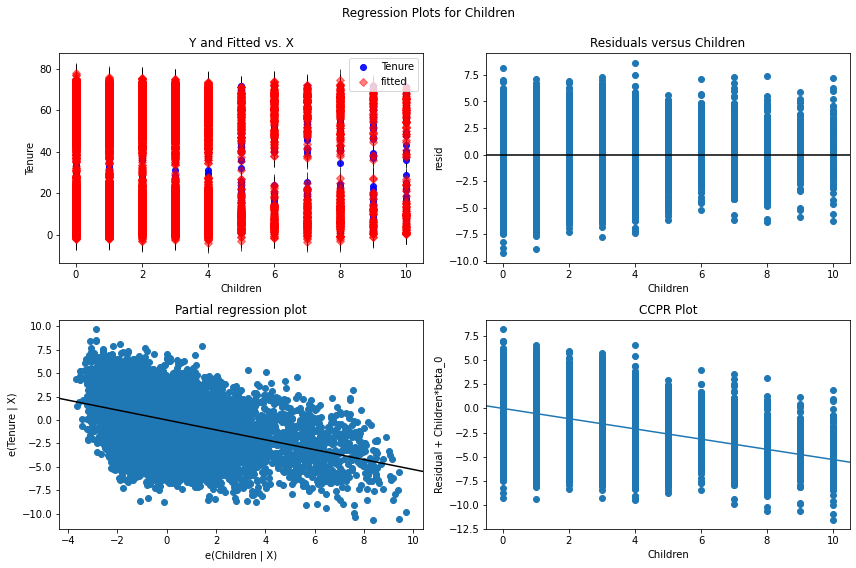

In [123]:
# Residual plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'Children', fig=fig)

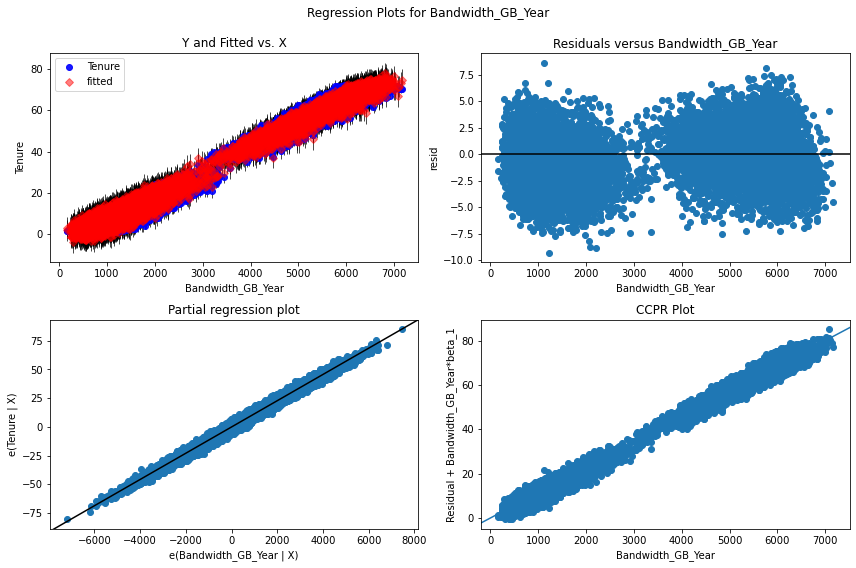

In [124]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'Bandwidth_GB_Year', fig=fig)

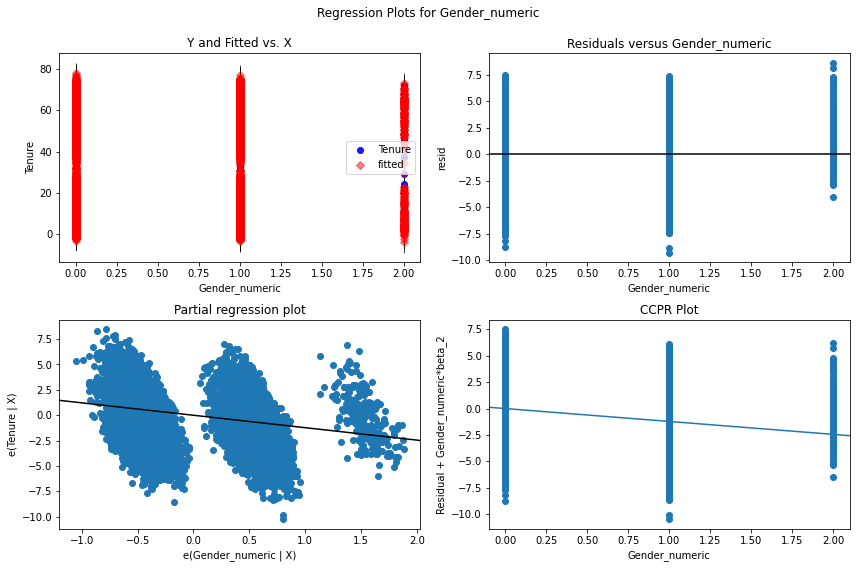

In [125]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'Gender_numeric', fig=fig)

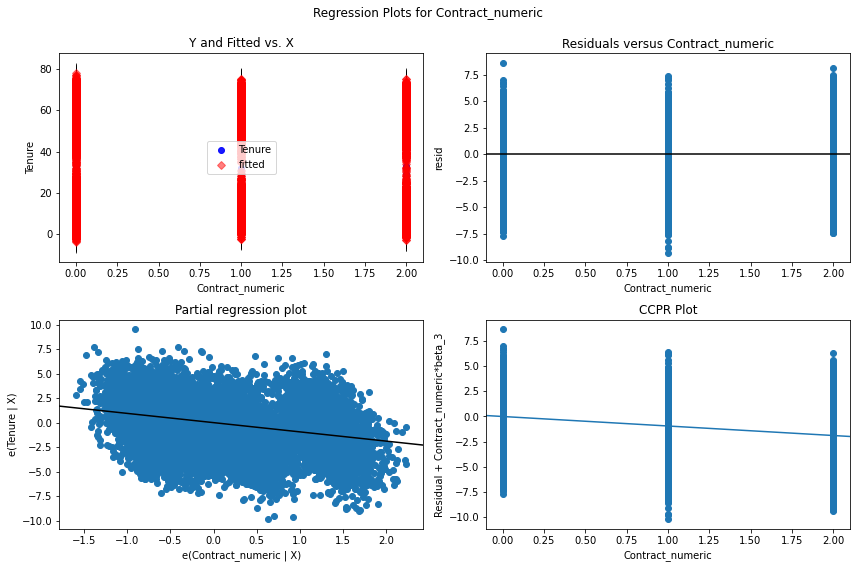

In [126]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'Contract_numeric', fig=fig)

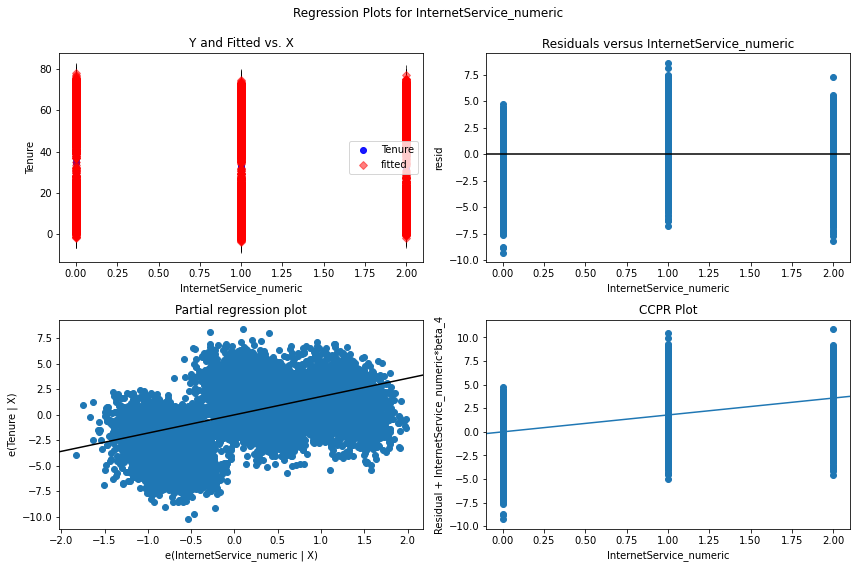

In [127]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'InternetService_numeric', fig=fig)

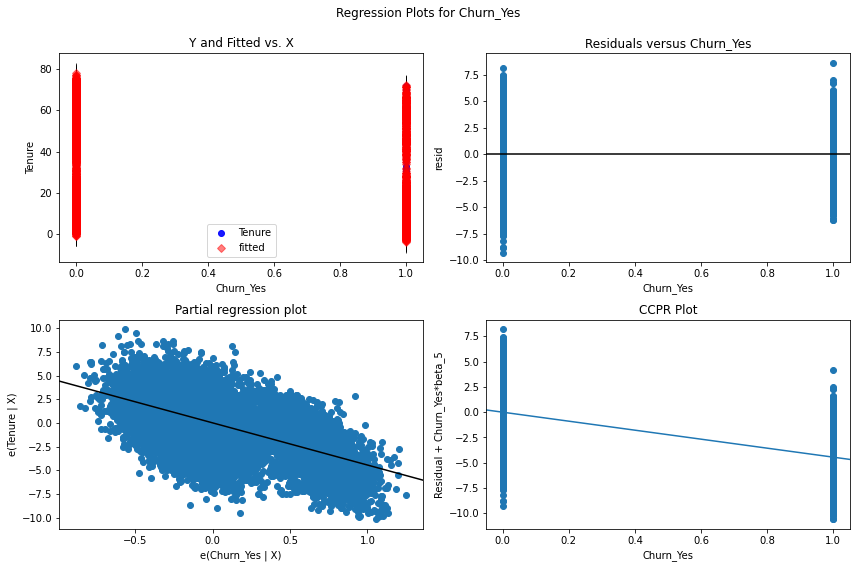

In [129]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'Churn_Yes', fig=fig)

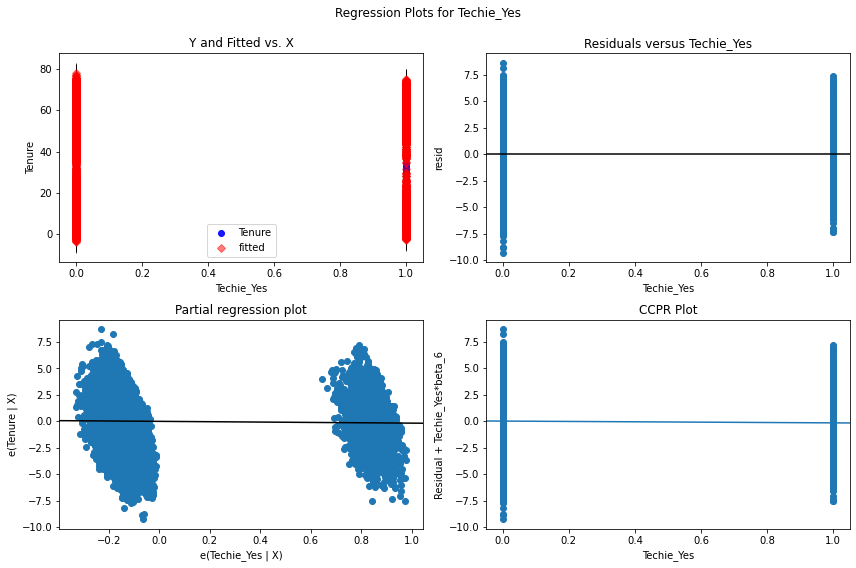

In [130]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'Techie_Yes', fig=fig)

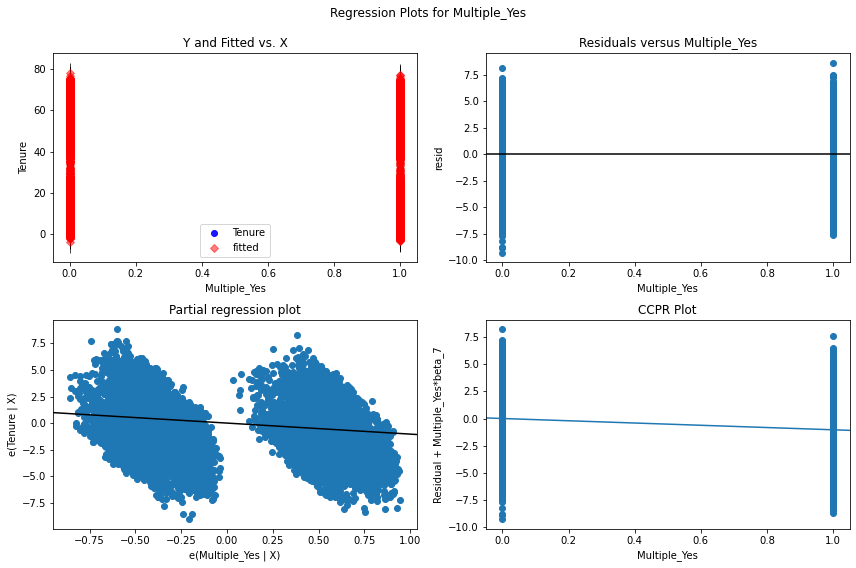

In [131]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'Multiple_Yes', fig=fig)

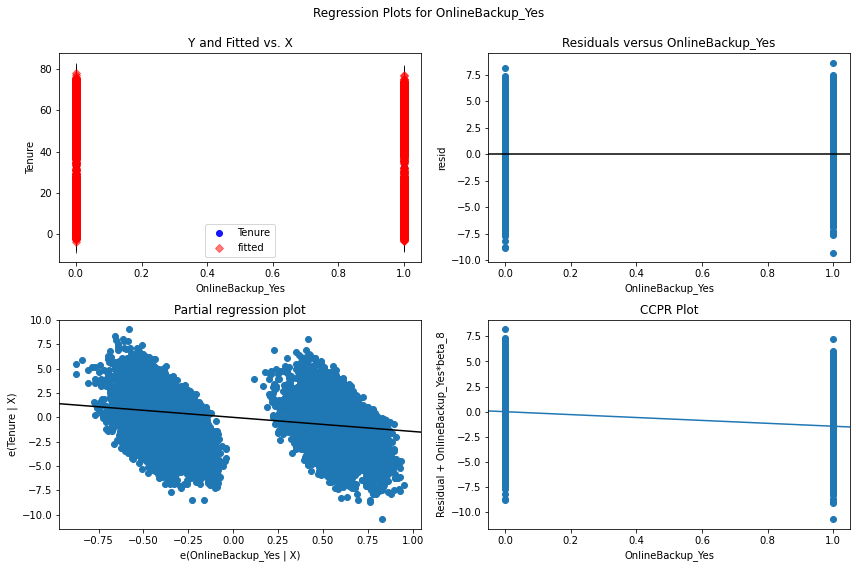

In [133]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'OnlineBackup_Yes', fig=fig)

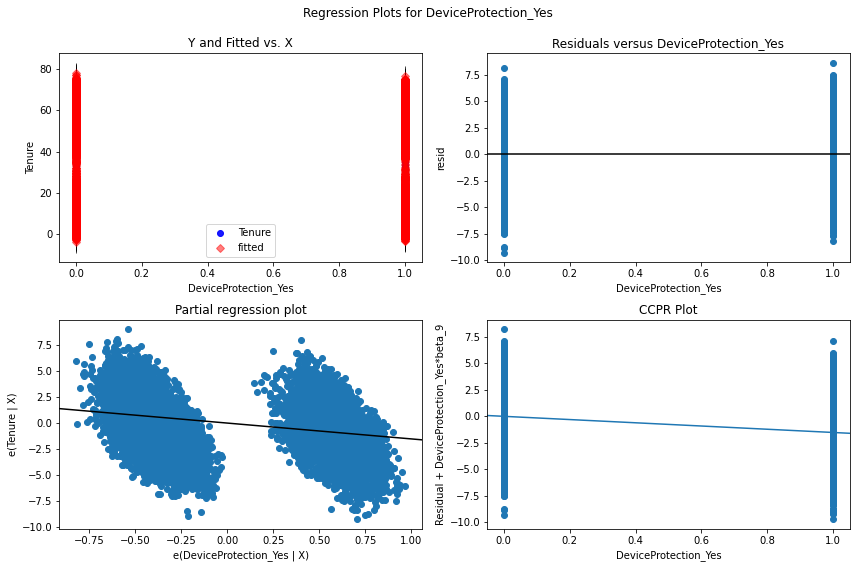

In [134]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est, 'DeviceProtection_Yes', fig=fig)